In [ ]:
!pip install arch==4.19

In [ ]:
import numpy as np
import pandas as pd
import investpy
import pylab
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.stats as stats
from arch import arch_model
import warnings
warnings.filterwarnings('ignore')

In [ ]:
    TSLA = investpy.get_stock_historical_data(stock='NKE',
                                        country='United States',
                                        from_date='01/04/2011',
                                        to_date='01/04/2021')
    ING = investpy.get_stock_historical_data(stock='INGA',
                                        country='Netherlands',
                                        from_date='01/04/2011',
                                        to_date='01/04/2021')
    Pfizer= investpy.get_stock_historical_data(stock='PFE',
                                        country='United States',
                                        from_date='01/04/2011',
                                        to_date='01/04/2021')
    SP500=investpy.get_index_historical_data(index='s&p 500',
                                    country='United States',
                                    from_date='01/04/2011',
                                    to_date='01/04/2021')
    euro_usd = investpy.get_currency_cross_historical_data(currency_cross='EUR/USD',
                                                    from_date='01/04/2011',
                                                    to_date='01/04/2021')
    bond=investpy.get_bond_historical_data('Netherlands 10Y',
                                    from_date='01/04/2011',
                                    to_date='01/04/2021')
    
    data=pd.DataFrame({'TSLA':TSLA.Close,'ING':ING.Close,'Pfizer':Pfizer.Close,'SP500':SP500.Close,'FX':euro_usd.Close,'bond':bond.Close})

In [ ]:
dd=data.dropna()
dd['bond_US']=dd['bond']*dd['FX']
dd['TSLA']= dd['TSLA'].apply(np.log)
dd['ING']= dd['ING'].apply(np.log)
dd['Pfizer']= dd['Pfizer'].apply(np.log)
dd['SP500']= dd['SP500'].apply(np.log)
dd['FX']= dd['FX'].apply(np.log)

In [ ]:
dd['bond_diff']= dd['bond_US'].diff()/100
dd['TSLA']= dd['TSLA'].diff()
dd['ING']= dd['ING'].diff()
dd['Pfizer']= dd['Pfizer'].diff()
dd['SP500']= dd['SP500'].diff()
dd['FX']= dd['FX'].diff()

In [ ]:
dd.dropna()

,TSLA,ING,Pfizer,SP500,FX,bond,bond_US,bond_diff
Date,,,,,,,,
2011-04-04,0.011435,-0.010953,0.007820,0.000345,-0.000633,3.651,5.192452,-0.000218
2011-04-05,0.006696,-0.008850,-0.004391,-0.000180,0.000070,3.655,5.198506,0.000061
2011-04-06,0.009706,0.016529,-0.007855,0.002181,0.007704,3.692,5.291744,0.000932
2011-04-07,-0.007655,-0.004381,0.001969,-0.001521,-0.002025,3.685,5.271024,-0.000207
2011-04-08,-0.008747,0.012002,0.006374,-0.004013,0.012298,3.747,5.426031,0.001550
...,...,...,...,...,...,...,...,...
2021-03-26,0.033256,-0.000985,0.016129,0.016494,0.002716,-0.289,-0.340904,0.000391
2021-03-29,0.003753,-0.006920,0.010155,-0.000868,-0.002886,-0.259,-0.304636,0.000363
2021-03-30,-0.004053,0.038915,-0.014025,-0.003163,-0.004089,-0.225,-0.263565,0.000411


In [ ]:
dd['ING_US']= dd['ING']+dd['FX']
dd['bond_minus']= -dd['bond_diff']
dd['loss']= (1-dd['TSLA'].apply(np.exp))*0.15+(1-dd['Pfizer'].apply(np.exp))*0.15
+(1-dd['SP500'].apply(np.exp))*0.15+(1-dd['ING_US'].apply(np.exp))*0.15
-0.4*(1-dd['bond_minus'].apply(np.exp))+0.4*dd['bond_US']/25000

Date
2011-04-01         NaN
2011-04-04    0.000170
2011-04-05    0.000059
2011-04-06   -0.000288
2011-04-07    0.000167
                ...   
2021-03-26   -0.000162
2021-03-29   -0.000150
2021-03-30   -0.000168
2021-03-31    0.000048
2021-04-01    0.000164
Length: 2493, dtype: float64

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   2.,   1.,   2.,
          2.,   0.,   2.,   2.,   1.,   2.,   2.,   2.,   2.,   3.,   0.,
          3.,   4.,   7.,  12.,  12.,  14.,  22.,  39.,  37.,  65.,  70.,
        108., 119., 158., 170., 191., 249., 210., 204., 172., 141., 118.,
         65.,  62.,  55.,  42.,  18.,  13.,  21.,  11.,  11.,  10.,   4.,
          3.,   2.,   5.,   1.,   2.,   2.,   3.,   2.,   2.,   2.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([-2.91333952e-02, -2.85515908e-02, -2.79697864e-02, -2.73879819e-02,
        -2.68061775e-02, -2.62243731e-02, -2.56425686e-02, -2.50607642e-02,
        -2.44789598e-02, -2.38971553e-02, -2.33153509e-02, -2.27335465e-02,
        -2.21517421e-02, -2.15699376e-02, -2.09881332e-02, -2.04063288e-02,
        -1.982

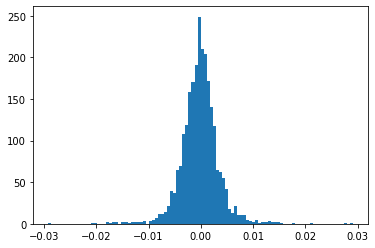

In [ ]:
plt.hist(dd['loss'],bins=100)

In [ ]:
port_loss = pd.DataFrame(columns=['TSLA','ING','Pfizer','SP500','bond'])
port_loss['TSLA']= 1-dd['TSLA'].apply(np.exp)
port_loss['Pfizer']=1-dd['Pfizer'].apply(np.exp)
port_loss['SP500']=1-dd['SP500'].apply(np.exp)
port_loss['ING']=1-dd['ING_US'].apply(np.exp)
port_loss['bond']= -(1-dd['bond_minus'].apply(np.exp))+dd['bond_US']/25000

In [ ]:
port_loss.dropna()

,TSLA,ING,Pfizer,SP500,bond
Date,,,,,
2011-04-04,-0.011500,0.011519,-0.007851,-0.000345,0.000426
2011-04-05,-0.006718,0.008741,0.004382,0.000180,0.000147
2011-04-06,-0.009754,-0.024530,0.007824,-0.002184,-0.000720
2011-04-07,0.007626,0.006386,-0.001971,0.001520,0.000418
2011-04-08,0.008709,-0.024598,-0.006394,0.004004,-0.001332
...,...,...,...,...,...
2021-03-26,-0.033815,-0.001733,-0.016260,-0.016631,-0.000404
2021-03-29,-0.003760,0.009759,-0.010207,0.000868,-0.000375
2021-03-30,0.004045,-0.035440,0.013927,0.003158,-0.000421


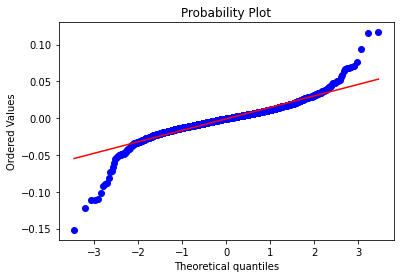

In [ ]:
stats.probplot(port_loss['TSLA'][1:], dist="norm", plot=pylab)
pylab.show()

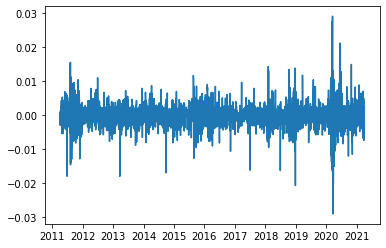

In [ ]:
plt.plot(dd.dropna()['loss'])

In [ ]:
garch_result_tsla = pd.DataFrame(columns=['TSLA','tsla_var','tsla_vol'])
garch_result_tsla['TSLA'] = port_loss.dropna()['TSLA']
# garch_result_tsla['tsla_var'].values[249]= np.var(garch_result_tsla['TSLA'][0:250])
# garch_result_tsla['tsla_vol'].values[249]= np.sqrt(garch_result_tsla['tsla_var'][249])
garch_result_tsla

,TSLA,tsla_var,tsla_vol
Date,,,
2011-04-04,-0.011500,NaN,NaN
2011-04-05,-0.006718,NaN,NaN
2011-04-06,-0.009754,NaN,NaN
2011-04-07,0.007626,NaN,NaN
2011-04-08,0.008709,NaN,NaN
...,...,...,...
2021-03-26,-0.033815,NaN,NaN
2021-03-29,-0.003760,NaN,NaN
2021-03-30,0.004045,NaN,NaN


In [ ]:
garch_result_tsla.iloc[249]

TSLA       -0.005564
tsla_var         NaN
tsla_vol         NaN
Name: 2012-03-30 00:00:00, dtype: object

In [ ]:
for i in range(0,250):
    tsla_iter_returns = garch_result_tsla['TSLA'][i:i+250]
    tsla_iter_am = arch_model(tsla_iter_returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
    tsla_iter_res = tsla_iter_am.fit()
    temp = tsla_iter_res.forecast(horizon=1, reindex=False).variance
    garch_result_tsla['tsla_var'].values[i+249] = temp.iloc[0].to_numpy()[0]
    garch_result_tsla['tsla_vol'].values[i+249]=  np.sqrt(garch_result_tsla['tsla_var'][i+249])

Iteration:      6,   Func. Count:     60,   Neg. LLF: -715.1025898097892
Optimization terminated successfully    (Exit mode 0)
            Current function value: -715.1025878948258
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3967267785670.3174
Iteration:      2,   Func. Count:     17,   Neg. LLF: 700738.8730812571
Iteration:      3,   Func. Count:     28,   Neg. LLF: 52857394079.98101
Iteration:      4,   Func. Count:     39,   Neg. LLF: 59677.85671004361
Iteration:      5,   Func. Count:     50,   Neg. LLF: 20556036323.992508
Iteration:      6,   Func. Count:     61,   Neg. LLF: 47624616280138.77
Iteration:      7,   Func. Count:     72,   Neg. LLF: 8569050907.736327
Iteration:      8,   Func. Count:     84,   Neg. LLF: -714.7326059798177
Optimization terminated successfully    (Exit mode 0)
            Current function value: -714.7326042349515
            Iterations: 12
   

In [ ]:
garch_result_tsla.dropna()

,TSLA,tsla_var,tsla_vol
Date,,,
2012-03-30,-0.005564,0.000161,0.012692
2012-04-02,-0.005164,0.000145,0.012056
2012-04-03,-0.008073,0.00014,0.011848
2012-04-04,0.003640,0.000131,0.011447
2012-04-05,-0.008403,0.000126,0.011221
...,...,...,...
2013-03-28,-0.009237,0.000212,0.014565
2013-04-02,0.001695,0.000178,0.013346
2013-04-03,0.000000,0.000173,0.013171


In [ ]:
garch_result_ing = pd.DataFrame(columns=['ING','ing_var','ing_vol'])
garch_result_ing['ING'] = port_loss.dropna()['ING']
for i in range(0,250):
    ing_iter_returns = garch_result_ing['ING'][i:i+250]
    ing_iter_am = arch_model(ing_iter_returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
    ing_iter_res = ing_iter_am.fit()
    temp = ing_iter_res.forecast(horizon=1, reindex=False).variance
    garch_result_ing['ing_var'].values[i+249] = temp.iloc[0].to_numpy()[0]
    garch_result_ing['ing_vol'].values[i+249]= np.sqrt(garch_result_ing['ing_var'][i+249])

Iteration:      4,   Func. Count:     35,   Neg. LLF: 3053821435347.2896
Iteration:      5,   Func. Count:     44,   Neg. LLF: -469.02005339806226
Optimization terminated successfully    (Exit mode 0)
            Current function value: -469.02005634775315
            Iterations: 9
            Function evaluations: 44
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: 814634434369615.0
Iteration:      2,   Func. Count:     16,   Neg. LLF: -469.84681820609165
Optimization terminated successfully    (Exit mode 0)
            Current function value: -469.8468215645883
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 581881.7220088623
Iteration:      2,   Func. Count:     16,   Neg. LLF: -470.0063737659035
Optimization terminated successfully    (Exit mode 0)
            Current function value: -470.00637724228284
            Iterations: 6
         

In [ ]:
garch_result_ing.dropna()

,ING,ing_var,ing_vol
Date,,,
2012-03-30,0.004804,0.000868,0.029455
2012-04-02,-0.006414,0.000763,0.027624
2012-04-03,0.044521,0.000856,0.029249
2012-04-04,0.059390,0.001076,0.032808
2012-04-05,-0.006188,0.00106,0.032556
...,...,...,...
2013-03-28,0.009696,0.000607,0.024639
2013-04-02,-0.050869,0.000714,0.026723
2013-04-03,0.042363,0.000771,0.027773


In [ ]:
garch_result_pfi = pd.DataFrame(columns=['Pfizer','pfi_var','pfi_vol'])
garch_result_pfi['Pfizer'] = port_loss.dropna()['Pfizer']
for i in range(0,250):
    pfi_iter_returns = garch_result_pfi['Pfizer'][i:i+250]
    pfi_iter_am = arch_model(pfi_iter_returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
    pfi_iter_res = pfi_iter_am.fit()
    temp = pfi_iter_res.forecast(horizon=1, reindex=False).variance
    garch_result_pfi['pfi_var'].values[i+249] = temp.iloc[0].to_numpy()[0]
    garch_result_pfi['pfi_vol'].values[i+249]= np.sqrt(garch_result_pfi['pfi_var'][i+249])

            Gradient evaluations: 2
Iteration:      1,   Func. Count:      5,   Neg. LLF: -825.7231041384133
Optimization terminated successfully    (Exit mode 0)
            Current function value: -825.7231050436623
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1009142919278.5178
Iteration:      2,   Func. Count:     16,   Neg. LLF: 42256366528.15968
Iteration:      3,   Func. Count:     29,   Neg. LLF: -826.3627017320509
Optimization terminated successfully    (Exit mode 0)
            Current function value: -826.3627027728226
            Iterations: 7
            Function evaluations: 29
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 14399841.759342335
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2392101073135608.5
Iteration:      3,   Func. Count:     29,   Neg. LLF: -826.9149271953678
Optimization terminated successfully   

In [ ]:
garch_result_pfi.dropna()

,Pfizer,pfi_var,pfi_vol
Date,,,
2012-03-30,-0.009813,0.000095,0.009745
2012-04-02,0.002208,0.000086,0.009284
2012-04-03,0.002213,0.000081,0.008985
2012-04-04,0.006655,0.000087,0.009339
2012-04-05,0.002233,0.000079,0.008916
...,...,...,...
2013-03-28,-0.007682,0.000078,0.008843
2013-04-02,-0.012821,0.000077,0.00879
2013-04-03,0.006842,0.000077,0.00876


In [ ]:
garch_result_sp = pd.DataFrame(columns=['SP500','sp_var','sp_vol'])
garch_result_sp['SP500'] = port_loss.dropna()['SP500']
for i in range(0,250):
    sp_iter_returns = garch_result_sp['SP500'][i:i+250]
    sp_iter_am = arch_model(sp_iter_returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
    sp_iter_res = sp_iter_am.fit()
    temp = sp_iter_res.forecast(horizon=1, reindex=False).variance
    garch_result_sp['sp_var'].values[i+249] = temp.iloc[0].to_numpy()[0]
    garch_result_sp['sp_vol'].values[i+249]= np.sqrt(garch_result_sp['sp_var'][i+249])

Optimization terminated successfully    (Exit mode 0)
            Current function value: -813.5091424692142
            Iterations: 2
            Function evaluations: 28
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 151198021004.5142
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1.9445596700639855e+19
Optimization terminated successfully    (Exit mode 0)
            Current function value: -811.3532745282898
            Iterations: 2
            Function evaluations: 28
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 76100698534.64008
Iteration:      2,   Func. Count:     18,   Neg. LLF: 7.324849759888978e+17
Optimization terminated successfully    (Exit mode 0)
            Current function value: -812.5756991341354
            Iterations: 2
            Function evaluations: 27
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 320648864311.9635
Iterati

In [ ]:
garch_result_sp.dropna()

,SP500,sp_var,sp_vol
Date,,,
2012-03-30,-0.003698,0.000052,0.007221
2012-04-02,-0.007505,0.00005,0.007079
2012-04-03,0.003989,0.000048,0.006921
2012-04-04,0.010202,0.000066,0.008101
2012-04-05,0.000629,0.000056,0.007471
...,...,...,...
2013-03-28,-0.004057,0.000059,0.007694
2013-04-02,-0.000676,0.000053,0.007255
2013-04-03,0.010546,0.000059,0.00771


In [ ]:
garch_result_bd = pd.DataFrame(columns=['bond','bd_var','bd_vol'])
garch_result_bd['bond'] = port_loss.dropna()['bond']
for i in range(0,250):
    bd_iter_returns = garch_result_bd['bond'][i:i+250]
    bd_iter_am = arch_model(bd_iter_returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
    bd_iter_res = bd_iter_am.fit()
    temp = bd_iter_res.forecast(horizon=1, reindex=False).variance
    garch_result_bd['bd_var'].values[i+249] = temp.iloc[0].to_numpy()[0]
    garch_result_bd['bd_vol'].values[i+249]= np.sqrt(garch_result_bd['bd_var'][i+249])

Inequality constraints incompatible    (Exit mode 4)
            Current function value: -1463.4688725317828
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      5,   Neg. LLF: -1463.7958460655332
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -1463.7958473522708
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      5,   Neg. LLF: -1465.159340695705
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -1465.159341924737
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      5,   Neg. LLF: -1465.5175069504248
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -1465.517507947085
            Iterations: 1
            Function eval

In [ ]:
garch_result_bd.dropna()

,bond,bd_var,bd_vol
Date,,,
2012-03-30,0.000679,0.000001,0.000779
2012-04-02,0.000732,0.000001,0.000772
2012-04-03,-0.000082,0.000001,0.000761
2012-04-04,0.000495,0.000001,0.000749
2012-04-05,0.000537,0.000001,0.000738
...,...,...,...
2013-03-28,-0.001607,0.0,0.000695
2013-04-02,0.000110,0.0,0.00067
2013-04-03,0.000523,0.0,0.000655


In [ ]:
garch_result_total= pd.DataFrame(columns=['TSLA','ING','Pfizer','SP500','bond'])
garch_result_total['TSLA'] = garch_result_tsla.dropna()['tsla_vol']
garch_result_total['ING'] = garch_result_ing.dropna()['ing_vol']
garch_result_total['Pfizer'] = garch_result_pfi.dropna()['pfi_vol']
garch_result_total['SP500'] = garch_result_sp.dropna()['sp_vol']
garch_result_total['bond'] = garch_result_bd.dropna()['bd_vol']

In [ ]:
garch_result_total

,TSLA,ING,Pfizer,SP500,bond
Date,,,,,
2012-03-30,0.012692,0.029455,0.009745,0.007221,0.000779
2012-04-02,0.012056,0.027624,0.009284,0.007079,0.000772
2012-04-03,0.011848,0.029249,0.008985,0.006921,0.000761
2012-04-04,0.011447,0.032808,0.009339,0.008101,0.000749
2012-04-05,0.011221,0.032556,0.008916,0.007471,0.000738
...,...,...,...,...,...
2013-03-28,0.014565,0.024639,0.008843,0.007694,0.000695
2013-04-02,0.013346,0.026723,0.00879,0.007255,0.00067
2013-04-03,0.013171,0.027773,0.00876,0.00771,0.000655


In [ ]:
port_corr = port_loss.corr()
port_corr

,TSLA,ING,Pfizer,SP500,bond
TSLA,1.000000,0.314870,0.361529,0.633730,0.152510
ING,0.314870,1.000000,0.275990,0.514132,0.409231
Pfizer,0.361529,0.275990,1.000000,0.627393,0.140182
SP500,0.633730,0.514132,0.627393,1.000000,0.242966
bond,0.152510,0.409231,0.140182,0.242966,1.000000


In [ ]:
var_975_list=[]
var_99_list=[]
es_975_list=[]
es_99_list=[]
invest_total= 1000000
for i in range(0,250):
    vc_matrix = port_corr.mul(garch_result_total.iloc[i,:].values,axis=0).mul(garch_result_total.iloc[i,:].values,axis=1)
    weights = np.array([.15, .15, .15, .15, .4])
    avg_rets = port_loss.dropna()[0:i+249].mean()  
    port_mean = avg_rets.dot(weights)
    port_stdev = np.sqrt(weights.T.dot(vc_matrix).dot(weights))
    vaR_975= (-port_mean + norm.ppf(0.975)*port_stdev)*invest_total
    vaR_99=(-port_mean + norm.ppf(0.99)*port_stdev)*invest_total
    var_975_list.append(vaR_975)
    var_99_list.append(vaR_99)
    ES_975 = (-port_mean + norm.pdf(norm.ppf(0.975))/(1-0.975)*port_stdev)*invest_total
    ES_99 = (-port_mean + norm.pdf(norm.ppf(0.99))/(1-0.99)*port_stdev)*invest_total
    es_975_list.append(ES_975)
    es_99_list.append(ES_99)

In [ ]:
test=dd.dropna()['loss']*invest_total
test.iloc[249]

-2306.469822143642

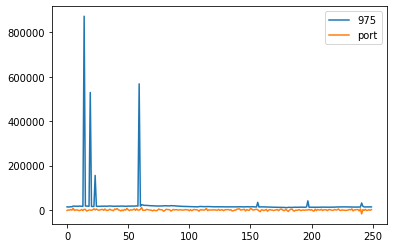

In [ ]:
plt.plot(var_975_list,label='975')
plt.plot(test.to_numpy()[249:499],label='port')
#plt.ylim(-20000,50000)
plt.legend()
plt.show()

In [ ]:
fhs_result_tsla = pd.DataFrame(columns=['TSLA','tsla_var','tsla_vol'])
fhs_result_tsla['TSLA'] = port_loss.dropna()['TSLA']
fhs_result_tsla['tsla_var'].values[249]= np.var(fhs_result_tsla['TSLA'][0:250])
fhs_result_tsla['tsla_vol'].values[249]= np.sqrt(fhs_result_tsla['tsla_var'][249])
fhs_result_tsla.dropna()

,TSLA,tsla_var,tsla_vol
Date,,,
2012-03-30,-0.005564,0.000326,0.018042


In [ ]:
for i in range(0,500):
    lambda_num=0.94
    fhs_result_tsla['tsla_var'].values[i+250] = lambda_num*(fhs_result_tsla['tsla_var'][i+249])+(1-lambda_num) *(fhs_result_tsla['TSLA'][i+249]**2)
    fhs_result_tsla['tsla_vol'].values[i+250]= np.sqrt(fhs_result_tsla['tsla_var'][i+250])
fhs_result_tsla['tsla_rf']=fhs_result_tsla['TSLA']/fhs_result_tsla['tsla_vol']

In [ ]:
fhs_result_tsla.dropna()

,TSLA,tsla_var,tsla_vol,tsla_rf
Date,,,,
2012-03-30,-0.005564,0.000326,0.018042,-0.308383
2012-04-02,-0.005164,0.000308,0.017545,-0.294333
2012-04-03,-0.008073,0.000291,0.017058,-0.473299
2012-04-04,0.003640,0.000277,0.016656,0.218562
2012-04-05,-0.008403,0.000262,0.016173,-0.51959
...,...,...,...,...
2014-04-01,-0.007311,0.000184,0.013571,-0.538731
2014-04-02,-0.001882,0.000176,0.013279,-0.141708
2014-04-03,0.007513,0.000166,0.012883,0.583169


In [ ]:
fhs_result_ing = pd.DataFrame(columns=['ING','ing_var','ing_vol'])
fhs_result_ing['ING'] = port_loss.dropna()['ING']
fhs_result_ing['ing_var'].values[249]= np.var(fhs_result_ing['ING'][0:250])
fhs_result_ing['ing_vol'].values[249]= np.sqrt(fhs_result_ing['ing_var'][249])
fhs_result_ing.dropna()

,ING,ing_var,ing_vol
Date,,,
2012-03-30,0.004804,0.001925,0.043873


In [ ]:
for i in range(0,500):
    lambda_num=0.94
    fhs_result_ing['ing_var'].values[i+250] = lambda_num*(fhs_result_ing['ing_var'][i+249])+(1-lambda_num) *(fhs_result_ing['ING'][i+249]**2)
    fhs_result_ing['ing_vol'].values[i+250]= np.sqrt(fhs_result_ing['ing_var'][i+250])
fhs_result_ing['ing_rf']=fhs_result_ing['ING']/fhs_result_ing['ing_vol']

In [ ]:
fhs_result_ing.dropna()

,ING,ing_var,ing_vol,ing_rf
Date,,,,
2012-03-30,0.004804,0.001925,0.043873,0.109501
2012-04-02,-0.006414,0.001811,0.042553,-0.150722
2012-04-03,0.044521,0.001705,0.041287,1.078339
2012-04-04,0.059390,0.001721,0.041488,1.431507
2012-04-05,-0.006188,0.00183,0.042774,-0.144658
...,...,...,...,...
2014-04-01,-0.031906,0.000381,0.01953,-1.633642
2014-04-02,-0.007476,0.00042,0.020485,-0.36495
2014-04-03,-0.001252,0.000398,0.019945,-0.062758


In [ ]:
fhs_result_pfi = pd.DataFrame(columns=['Pfizer','pfi_var','pfi_vol'])
fhs_result_pfi['Pfizer'] = port_loss.dropna()['Pfizer']
fhs_result_pfi['pfi_var'].values[249]= np.var(fhs_result_pfi['Pfizer'][0:250])
fhs_result_pfi['pfi_vol'].values[249]= np.sqrt(fhs_result_pfi['pfi_var'][249])
fhs_result_pfi.dropna()

,Pfizer,pfi_var,pfi_vol
Date,,,
2012-03-30,-0.009813,0.000213,0.014586


In [ ]:
for i in range(0,500):
    lambda_num=0.94
    fhs_result_pfi['pfi_var'].values[i+250] = lambda_num*(fhs_result_pfi['pfi_var'][i+249])+(1-lambda_num) *(fhs_result_pfi['Pfizer'][i+249]**2)
    fhs_result_pfi['pfi_vol'].values[i+250]= np.sqrt(fhs_result_pfi['pfi_var'][i+250])
fhs_result_pfi['pfi_rf']=fhs_result_pfi['Pfizer']/fhs_result_pfi['pfi_vol']

In [ ]:
fhs_result_pfi.dropna()

,Pfizer,pfi_var,pfi_vol,pfi_rf
Date,,,,
2012-03-30,-0.009813,0.000213,0.014586,-0.672759
2012-04-02,0.002208,0.000206,0.014344,0.153964
2012-04-03,0.002213,0.000194,0.013918,0.159032
2012-04-04,0.006655,0.000182,0.013505,0.492782
2012-04-05,0.002233,0.000174,0.013194,0.16925
...,...,...,...,...
2014-04-01,0.005293,0.000125,0.011202,0.472469
2014-04-02,-0.010642,0.00012,0.010938,-0.972908
2014-04-03,-0.003407,0.000119,0.01092,-0.311951


In [ ]:
fhs_result_sp = pd.DataFrame(columns=['SP500','sp_var','sp_vol'])
fhs_result_sp['SP500'] = port_loss.dropna()['SP500']
fhs_result_sp['sp_var'].values[249]= np.var(fhs_result_sp['SP500'][0:250])
fhs_result_sp['sp_vol'].values[249]= np.sqrt(fhs_result_sp['sp_var'][249])
fhs_result_sp.dropna()

,SP500,sp_var,sp_vol
Date,,,
2012-03-30,-0.003698,0.000208,0.014426


In [ ]:
for i in range(0,500):
    lambda_num=0.94
    fhs_result_sp['sp_var'].values[i+250] = lambda_num*(fhs_result_sp['sp_var'][i+249])+(1-lambda_num) *(fhs_result_sp['SP500'][i+249]**2)
    fhs_result_sp['sp_vol'].values[i+250]= np.sqrt(fhs_result_sp['sp_var'][i+250])
fhs_result_sp['sp_rf']=fhs_result_sp['SP500']/fhs_result_sp['sp_vol']

In [ ]:
fhs_result_sp.dropna()

,SP500,sp_var,sp_vol,sp_rf
Date,,,,
2012-03-30,-0.003698,0.000208,0.014426,-0.25638
2012-04-02,-0.007505,0.000196,0.014016,-0.535445
2012-04-03,0.003989,0.000188,0.013712,0.290876
2012-04-04,0.010202,0.000178,0.013331,0.765347
2012-04-05,0.000629,0.000173,0.013164,0.047785
...,...,...,...,...
2014-04-01,-0.007039,0.000042,0.006453,-1.090827
2014-04-02,-0.002853,0.000042,0.00649,-0.439659
2014-04-03,0.001126,0.00004,0.006331,0.17793


In [ ]:
fhs_result_bond = pd.DataFrame(columns=['bond','bond_var','bond_vol'])
fhs_result_bond['bond'] = port_loss.dropna()['bond']
fhs_result_bond['bond_var'].values[249]= np.var(fhs_result_bond['bond'][0:250])
fhs_result_bond['bond_vol'].values[249]= np.sqrt(fhs_result_bond['bond_var'][249])
fhs_result_bond.dropna()

,bond,bond_var,bond_vol
Date,,,
2012-03-30,0.000679,0.000001,0.000986


In [ ]:
for i in range(0,500):
    lambda_num=0.94
    fhs_result_bond['bond_var'].values[i+250] = lambda_num*(fhs_result_bond['bond_var'][i+249])+(1-lambda_num) *(fhs_result_bond['bond'][i+249]**2)
    fhs_result_bond['bond_vol'].values[i+250]= np.sqrt(fhs_result_bond['bond_var'][i+250])
fhs_result_bond['bond_rf']=fhs_result_bond['bond']/fhs_result_bond['bond_vol']

In [ ]:
fhs_result_bond.dropna()

,bond,bond_var,bond_vol,bond_rf
Date,,,,
2012-03-30,0.000679,0.000001,0.000986,0.687982
2012-04-02,0.000732,0.000001,0.000971,0.753884
2012-04-03,-0.000082,0.000001,0.000958,-0.085143
2012-04-04,0.000495,0.000001,0.000929,0.532469
2012-04-05,0.000537,0.000001,0.000909,0.590698
...,...,...,...,...
2014-04-01,-0.000205,0.0,0.000486,-0.42155
2014-04-02,-0.000308,0.0,0.000474,-0.649319
2014-04-03,0.000443,0.0,0.000465,0.951182


In [ ]:
fhs_result_total= pd.DataFrame(columns=['TSLA','ING','Pfizer','SP500','bond'])
fhs_result_total['TSLA'] = fhs_result_tsla.dropna()['tsla_vol']
fhs_result_total['ING'] = fhs_result_ing.dropna()['ing_vol']
fhs_result_total['Pfizer'] = fhs_result_pfi.dropna()['pfi_vol']
fhs_result_total['SP500'] = fhs_result_sp.dropna()['sp_vol']
fhs_result_total['bond'] = fhs_result_bond.dropna()['bond_vol']

In [ ]:
fhs_result_tsla.dropna()['tsla_rf'][0:250]*fhs_result_tsla.dropna()['tsla_vol'][250]

Date
2012-03-30   -0.007243
2012-04-02   -0.006913
2012-04-03   -0.011116
2012-04-04    0.005133
2012-04-05   -0.012203
                ...   
2013-03-28   -0.007984
2013-04-02    0.001505
2013-04-03         0.0
2013-04-04   -0.007058
2013-04-05    0.006223
Name: tsla_rf, Length: 250, dtype: object

In [ ]:
fhs_var_975_list=[]
fhs_var_99_list=[]
fhs_es_975_list=[]
fhs_es_99_list=[]
for i in range(0,250):
    port_tsla = fhs_result_tsla.dropna()['tsla_rf'][i:250+i]*fhs_result_tsla.dropna()['tsla_vol'][250+i]
    port_ing = fhs_result_ing.dropna()['ing_rf'][i:250+i]*fhs_result_ing.dropna()['ing_vol'][250+i]
    port_pfi = fhs_result_pfi.dropna()['pfi_rf'][i:250+i]*fhs_result_pfi.dropna()['pfi_vol'][250+i]
    port_sp = fhs_result_sp.dropna()['sp_rf'][i:250+i]*fhs_result_sp.dropna()['sp_vol'][250+i]
    port_bond = fhs_result_bond.dropna()['bond_rf'][i:250+i]*fhs_result_bond.dropna()['bond_vol'][250+i]
    port_total = (0.15*port_tsla+0.15*port_ing+0.15*port_pfi+0.15*port_sp+0.4*port_bond)*invest_total
    fhs_var_975 = port_total.quantile(0.975)
    fhs_var_99 = port_total.quantile(0.99)
    fhs_var_975_list.append(fhs_var_975)
    fhs_var_99_list.append(fhs_var_99)
    fhs_es_975 = port_total[port_total >= port_total.quantile(0.975)].mean()
    fhs_es_99 = port_total[port_total >= port_total.quantile(0.99)].mean()
    fhs_es_975_list.append(fhs_es_975)
    fhs_es_99_list.append(fhs_es_99)

In [ ]:
plt.plot(garchresult_change['VaR_975'],label='garch_975')
#plt.plot(port_loss.dropna()[i:i+250],label='975')
#plt.plot(var_99_list,label='99')
plt.plot(fhs_var_975_list,label='fhs_975')
#plt.plot(-loss_test.to_numpy()[250:],label='port_loss')
plt.legend()
plt.show()

NameError: name 'garchresult_change' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=645d3506-ee2c-44c9-a8e9-fa6f8711818a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>